In [1]:
import re
from nltk.corpus import stopwords
from scipy import sparse
import numpy as np
import holidays
from utils import ExtractCalendar
from datetime import date
import re
import pandas as pd
from datetime import date


stop_words= stopwords.words('english')
# stop_words.extend(
#         ['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get',
#          'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot',
#          'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come',
#          'aci'])

texts = open('corpus.txt', 'r')
texts = texts.readlines()
texts
# text = ''.join([words for words in text])

['The future king is the prince\n',
 'Daughter is the princess\n',
 'Son is the prince\n',
 'Only a man can be a king\n',
 'Only a woman can be a queen\n',
 'The princess will be a queen\n',
 'Queen and king rule the realm\n',
 'The prince is a strong man\n',
 'The princess is a beautiful woman\n',
 'The royal family is the king and queen and their children\n',
 'Prince is only a boy now\n',
 'A boy will be a man']

In [3]:
def clean_text(
        string: str,
        punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_~''',
        stop_words=stopwords.words('english')
) -> str:
    string = re.sub(r'https?://\S+|www\.\S+', '', string)
    string = re.sub(r'<.*?>', '', string)

    for x in string.lower():
        if x in punctuations:
            string = string.replace(x, "")

    string = string.lower()
    string = ' '.join([word for word in string.split() if word not in stop_words])

    string = re.sub(r'\s+', ' ', string).strip()
    string = string.split()
    return string

In [4]:
window = 2
word_lists = []
all_text = []

for text in texts:
    text = clean_text(text)
    all_text += text
    for i, word in enumerate(text):
        for w in range(window):
            if i+1+w < len(text):
                word_lists.append([word]+[text[(i+1+w)]])
            if i - w - 1 >= 0:
                word_lists.append([word] + [text[(i - w - 1)]])
            # print(i,word)
word_lists


[['future', 'king'],
 ['future', 'prince'],
 ['king', 'prince'],
 ['king', 'future'],
 ['prince', 'king'],
 ['prince', 'future'],
 ['daughter', 'princess'],
 ['princess', 'daughter'],
 ['son', 'prince'],
 ['prince', 'son'],
 ['man', 'king'],
 ['king', 'man'],
 ['woman', 'queen'],
 ['queen', 'woman'],
 ['princess', 'queen'],
 ['queen', 'princess'],
 ['queen', 'king'],
 ['queen', 'rule'],
 ['king', 'rule'],
 ['king', 'queen'],
 ['king', 'realm'],
 ['rule', 'realm'],
 ['rule', 'king'],
 ['rule', 'queen'],
 ['realm', 'rule'],
 ['realm', 'king'],
 ['prince', 'strong'],
 ['prince', 'man'],
 ['strong', 'man'],
 ['strong', 'prince'],
 ['man', 'strong'],
 ['man', 'prince'],
 ['princess', 'beautiful'],
 ['princess', 'woman'],
 ['beautiful', 'woman'],
 ['beautiful', 'princess'],
 ['woman', 'beautiful'],
 ['woman', 'princess'],
 ['royal', 'family'],
 ['royal', 'king'],
 ['family', 'king'],
 ['family', 'royal'],
 ['family', 'queen'],
 ['king', 'queen'],
 ['king', 'family'],
 ['king', 'children'],
 

In [5]:
baskets

NameError: name 'baskets' is not defined

In [6]:
def create_unique_word_dict(text:list) -> dict:
    """

    :param text:
    :return:
    """
    words = list(set(text))

    unique_word_dict = {}
    for i, word in enumerate(words):
        unique_word_dict.update({word:i})

    return unique_word_dict
unique_word_dict = create_unique_word_dict(all_text)

# def create_one_hot_vectors(unique_words:dict)

In [7]:
# One-hot-encoding
n_words = len(unique_word_dict)
words = list(unique_word_dict.keys())

X = []
Y = []

for word_pair in word_lists:
    X.append((word_pair[0] == np.array(words))*1)
    Y.append((word_pair[1] == np.array(words))*1)
X = np.asarray(X)
Y = np.asarray(X)

In [8]:
word_lists

[['future', 'king'],
 ['future', 'prince'],
 ['king', 'prince'],
 ['king', 'future'],
 ['prince', 'king'],
 ['prince', 'future'],
 ['daughter', 'princess'],
 ['princess', 'daughter'],
 ['son', 'prince'],
 ['prince', 'son'],
 ['man', 'king'],
 ['king', 'man'],
 ['woman', 'queen'],
 ['queen', 'woman'],
 ['princess', 'queen'],
 ['queen', 'princess'],
 ['queen', 'king'],
 ['queen', 'rule'],
 ['king', 'rule'],
 ['king', 'queen'],
 ['king', 'realm'],
 ['rule', 'realm'],
 ['rule', 'king'],
 ['rule', 'queen'],
 ['realm', 'rule'],
 ['realm', 'king'],
 ['prince', 'strong'],
 ['prince', 'man'],
 ['strong', 'man'],
 ['strong', 'prince'],
 ['man', 'strong'],
 ['man', 'prince'],
 ['princess', 'beautiful'],
 ['princess', 'woman'],
 ['beautiful', 'woman'],
 ['beautiful', 'princess'],
 ['woman', 'beautiful'],
 ['woman', 'princess'],
 ['royal', 'family'],
 ['royal', 'king'],
 ['family', 'king'],
 ['family', 'royal'],
 ['family', 'queen'],
 ['king', 'queen'],
 ['king', 'family'],
 ['king', 'children'],
 

In [9]:
X.shape
Y.shape

(56, 17)

In [136]:
from tensorflow import keras
from keras import Input
from keras.models import Model
from keras.layers import Dense
# import tensorflow as tf

embed_size = 2
X.shape[1]
inp = Input(shape=X.shape[1],)
inp_layer = Dense(embed_size, activation='linear',)(inp)
hidden_layer = Dense(units=Y.shape[1], activation='softmax')(inp_layer)

model = Model(inputs=inp, outputs=hidden_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam')

model.fit(x=X, y=Y, batch_size=256, epochs=1000)


Epoch 1/1000
1/1 [==============================] - 0s 255ms/step - loss: 2.9156
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.9137
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.9118
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.9100
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.9081
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.9062
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.9044
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.9025
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.9007
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.8988
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.8970
Epoch 12/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.8951
Epoch 13/1000
1/1 [============================

In [144]:
weights = model.get_weights()[0]
embedding_dict = {}
for word in words:
    embedding_dict.update({word:weights[unique_word_dict[word]]})

In [145]:
embedding_dict

{'rule': array([ 1.3511293, -1.5719585], dtype=float32),
 'daughter': array([-0.42919812, -1.1395935 ], dtype=float32),
 'royal': array([-1.0391058,  1.1546292], dtype=float32),
 'beautiful': array([ 1.0651436 , -0.03102572], dtype=float32),
 'future': array([-1.2741997, -1.2132818], dtype=float32),
 'children': array([1.1938915, 1.1777687], dtype=float32),
 'boy': array([1.0412462, 1.402667 ], dtype=float32),
 'king': array([-1.3882995, -0.1082501], dtype=float32),
 'son': array([0.27890188, 1.076403  ], dtype=float32),
 'realm': array([ 1.1918607, -1.4442744], dtype=float32),
 'queen': array([-0.2970982,  1.2439268], dtype=float32),
 'family': array([-1.4650733,  1.4016684], dtype=float32),
 'prince': array([-0.2703186, -1.7200298], dtype=float32),
 'woman': array([1.3627009, 0.1245331], dtype=float32),
 'princess': array([ 1.4020379, -1.6195999], dtype=float32),
 'man': array([1.050963  , 0.80616176], dtype=float32),
 'strong': array([-1.4185901, -1.5814571], dtype=float32)}

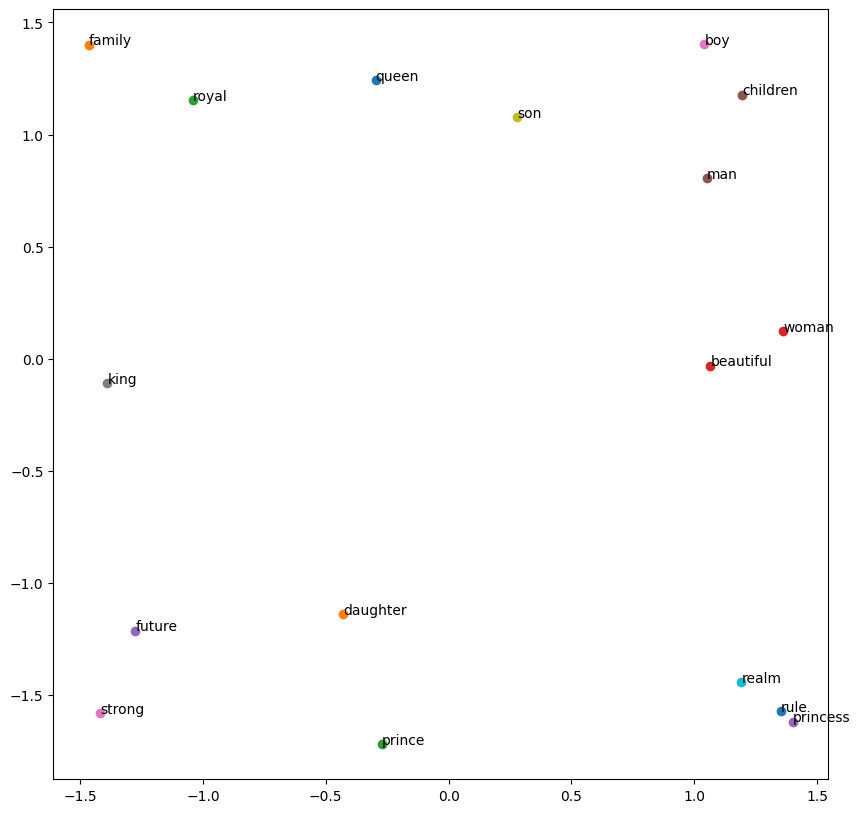

In [146]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for word in list(unique_word_dict.keys()):
    coord = embedding_dict[word]
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))

## Load the data from csv and format correctly

In [71]:
import pandas as pd
invoice_data = pd.read_csv('./input/invoice_data_final.csv')

baskets = invoice_data.loc[invoice_data.index.repeat(invoice_data['SalesQTY'])].groupby('Invoiceno')['ProductCode'].apply(list)
products_in_basket = invoice_data.loc[invoice_data.index.repeat(invoice_data['SalesQTY'])].groupby('Invoiceno')['ProductName'].apply(list)
other_elements = invoice_data[['Invoiceno','PrepareDate', 'WeekEndFlag', 'DayTimeFlag']].drop_duplicates().set_index(['Invoiceno'])
other_elements['PrepareDate'] = pd.to_datetime(other_elements.PrepareDate)
basket_corpus = pd.concat([baskets, products_in_basket, other_elements], axis=1)
daytime_dict = {key: i for i, key in enumerate(basket_corpus.DayTimeFlag.unique())}
basket_corpus.DayTimeFlag = basket_corpus.DayTimeFlag.map(daytime_dict)
basket_corpus



,ProductCode,ProductName,PrepareDate,WeekEndFlag,DayTimeFlag
Invoiceno,,,,,
D0071501010177,"[2500464, 2805315, 2805913, 2805913, 3100861]","[AARONG UHT Full Cream Liquid Milk 500ml, Prot...",2015-01-01 09:44:08.857,0,0
D0071501010182,"[2700164, 2700327, 2702241, 2500234]","[Radhuni Panch Foran 50 gm, Pran Thai Chilli S...",2015-01-01 09:56:30.700,0,0
D0071501010192,"[3901391, 4203132, 4203156, 2802216, 2802216, ...","[S201011 Party Spray Cragy Ribbon-PS1/2, S2010...",2015-01-01 10:08:11.857,0,0
D0071501010248,"[2805453, 2700122, 2400450, 2805452, 2700154, ...","[IFAD Eggy Instant Noodles Chicken 65Gm, Radhu...",2015-01-01 11:18:25.920,0,0
D0071501010311,"[2801349, 2801347, 2802229, 2300267]","[Golden Harvest Dal Puri 454gm (10 Pcs), GH De...",2015-01-01 12:07:57.460,0,0
...,...,...,...,...,...
D0072209191015,"[2816455, 2816455, 2815330, 2815330, 2815277, ...","[Fresh Healthy Choice Salted Biscuit 100g, Fre...",2022-09-19 21:14:46.067,0,3
D0072209191029,"[2603361, 2603361, 2603361, 2900006, 2900006, ...","[Wheel Laundry Soap 125g, Wheel Laundry Soap 1...",2022-09-19 21:39:07.430,0,3
D0072209191033,"[3017647, 3000680, 3811722, 3000382]","[Vaseline Mosquito Defence Original 50ml, Clos...",2022-09-19 21:42:29.560,0,3


## Add festival/Holiday flag

In [75]:
calendar = ExtractCalendar([2015, 2016, 2017, 2018, 2019, 2021, 2022], 'bangladesh')
def is_festival(_date):
    return _date in calendar.festivals

basket_corpus = pd.concat([basket_corpus, basket_corpus.PrepareDate.rename('FestivalFlag').apply(is_festival).astype(int)], axis=1)

/tmp/ipykernel_42055/3142944248.py:3: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return _date in calendar.festivals


In [76]:
basket_corpus[['ProductCode', 'ProductName', 'WeekEndFlag', 'DayTimeFlag', 'FestivalFlag']]

,ProductCode,ProductName,WeekEndFlag,DayTimeFlag,FestivalFlag
Invoiceno,,,,,
D0071501010177,"[2500464, 2805315, 2805913, 2805913, 3100861]","[AARONG UHT Full Cream Liquid Milk 500ml, Prot...",0,0,0
D0071501010182,"[2700164, 2700327, 2702241, 2500234]","[Radhuni Panch Foran 50 gm, Pran Thai Chilli S...",0,0,0
D0071501010192,"[3901391, 4203132, 4203156, 2802216, 2802216, ...","[S201011 Party Spray Cragy Ribbon-PS1/2, S2010...",0,0,0
D0071501010248,"[2805453, 2700122, 2400450, 2805452, 2700154, ...","[IFAD Eggy Instant Noodles Chicken 65Gm, Radhu...",0,0,0
D0071501010311,"[2801349, 2801347, 2802229, 2300267]","[Golden Harvest Dal Puri 454gm (10 Pcs), GH De...",0,0,0
...,...,...,...,...,...
D0072209191015,"[2816455, 2816455, 2815330, 2815330, 2815277, ...","[Fresh Healthy Choice Salted Biscuit 100g, Fre...",0,3,0
D0072209191029,"[2603361, 2603361, 2603361, 2900006, 2900006, ...","[Wheel Laundry Soap 125g, Wheel Laundry Soap 1...",0,3,0
D0072209191033,"[3017647, 3000680, 3811722, 3000382]","[Vaseline Mosquito Defence Original 50ml, Clos...",0,3,0


In [43]:

invoice_data[['SalesQTY']] = invoice_data[['SalesQTY']].astype(int)
product_name_map =invoice_data[['ProductCode','ProductName']].drop_duplicates().set_index('ProductCode').to_dict()['ProductName']
unique_product_code_dict = {value: key for key, value in invoice_data[['ProductCode']].drop_duplicates(ignore_index=True).to_dict()['ProductCode'].items()}
unique_product_name_dict = {value: key for key, value in invoice_data[['ProductName']].drop_duplicates(ignore_index=True).to_dict()['ProductName'].items()}



In [55]:
product_name_map[2805315]

'Protiva Chui Pitha 200g'

In [40]:
unique_product_name_dict

{'AARONG UHT Full Cream Liquid Milk 500ml': 0,
 'Protiva Chui Pitha 200g': 1,
 'Satej Coconut Naru 200g': 2,
 'X-Shonalika Chicken Dressed Large (Pcs)': 3,
 'Radhuni Panch Foran 50 gm': 4,
 'Pran Thai Chilli Sauce 340gm': 5,
 'Pran Soy Sauce 650ml': 6,
 'No.1Sweetened condensed milk 400 gm': 7,
 'S201011 Party Spray Cragy Ribbon-PS1/2': 8,
 'S201011 Love Balloon Thai 20 Pcs BL 1/7': 9,
 'S201011 Balloon Thai BL 1/2': 10,
 'MARS Fun Size 18gm': 11,
 'IFAD Eggy Instant Noodles Chicken 65Gm': 12,
 'Radhuni Turmeric Regular 50 gm': 13,
 'Shwapno Sugar (P) 1Kg': 14,
 'IFAD Eggy Instant Noodles Masala 65Gm': 15,
 'Radhuni Chilli 100g': 16,
 'ACI Pure Salt 1kg': 17,
 'Harpic Power Plus 500 ML': 18,
 'Ispahani Mirzapore Bestleaf 200g(P.Bag)': 19,
 'Mama Instant Noodles Chicken Flav. 248g': 20,
 'Rupchanda Soyabean Oil 2ltr': 21,
 'Teer Suji 500gm': 22,
 'Golden Harvest Dal Puri 454gm (10 Pcs)': 23,
 'GH Deshi Paratha 20pcs 1300g': 24,
 'Ruchi Barbecue Chanachur 170 gm': 25,
 'Mac Coffee Mix 3B

In [41]:
unique_product_code_dict

{2500464: 0,
 2805315: 1,
 2805913: 2,
 3100861: 3,
 2700164: 4,
 2700327: 5,
 2702241: 6,
 2500234: 7,
 3901391: 8,
 4203132: 9,
 4203156: 10,
 2802216: 11,
 2805453: 12,
 2700122: 13,
 2400450: 14,
 2805452: 15,
 2700154: 16,
 2400029: 17,
 2600082: 18,
 2300193: 19,
 2805707: 20,
 2400017: 21,
 2400066: 22,
 2801349: 23,
 2801347: 24,
 2802229: 25,
 2300267: 26,
 2701861: 27,
 2200033: 28,
 2200147: 29,
 2400023: 30,
 2500068: 31,
 2700060: 32,
 3101315: 33,
 2800071: 34,
 2800400: 35,
 2700155: 36,
 3000833: 37,
 2800249: 38,
 2400084: 39,
 2400513: 40,
 2805166: 41,
 2801405: 42,
 2600069: 43,
 3333053: 44,
 3003439: 45,
 3333888: 46,
 2807734: 47,
 3333944: 48,
 2602652: 49,
 3002319: 50,
 2700105: 51,
 2400868: 52,
 2400025: 53,
 2600008: 54,
 2400441: 55,
 2600079: 56,
 2600015: 57,
 2600111: 58,
 3000798: 59,
 3000831: 60,
 2400007: 61,
 2400019: 62,
 2701535: 63,
 2702154: 64,
 2805179: 65,
 2801287: 66,
 2500100: 67,
 2500704: 68,
 2500002: 69,
 2901015: 70,
 2900936: 71,
 2

## Create basket iterator

In [102]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


# baskets = [TaggedDocument(product, i) for key, value in pro]
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
documents[0]
# model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

[0]

In [111]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
class tagged_basket_iterator:
    def __init__(self, tb):
        self._df = tb._df
        self._index = 0

    def __next__(self):
        total_len = len(self._df)
        if self._index >= total_len:
            raise StopIteration
        value = self._df.iloc[self._index]['ProductCode']
        tag = self._df.index[self._index]
        self._index += 1
        return TaggedDocument(words=value, tags=[tag])

class tagged_baskets:
    def __init__(self, df):
        self._df = df

    def __iter__(self):
        return tagged_basket_iterator(self)

In [112]:
basket_df = basket_corpus[['ProductCode', 'ProductName', 'WeekEndFlag', 'DayTimeFlag', 'FestivalFlag']]
basket_class = tagged_baskets(basket_df)
# for item in basket_class:
#     basket_end = item


In [113]:
basket_end[0]

ProductCode                           [3382831, 3382831, 3384516]
ProductName     [S201409 MEN`S POLO SHIRT-BOGO -2 PCS, S201409...
WeekEndFlag                                                     0
DayTimeFlag                                                     3
FestivalFlag                                                    0
Name: D0072209191037, dtype: object

In [114]:
model = Doc2Vec(tagged_baskets(basket_df),
	                    dm=0,
	                    dbow_words=1,
	                    vector_size=128, #Tuned parameter
	                    window=500,
	                    epochs=10, #Tuned parameter
	                    hs=1,
	                    workers=4,
	                    min_count=50 # We have 2M baskets. And if the item doesnot even exist in 50 baskets, the embedding quality will be poor. Better to drop than create a poor embedding
	               )

In [2]:


invoice_data = pd.read_csv('./input/invoice_data_2.csv')
invoice_data[['SalesQTY']] = invoice_data[['SalesQTY']].astype(int)
product_name_map =invoice_data[['ProductCode','ProductName']].drop_duplicates().set_index('ProductName').to_dict()['ProductCode']
unique_product_code_dict = {value: key for key, value in invoice_data[['ProductCode']].drop_duplicates(ignore_index=True).to_dict()['ProductCode'].items()}
unique_product_name_dict = {value: key for key, value in invoice_data[['ProductName']].drop_duplicates(ignore_index=True).to_dict()['ProductName'].items()}

baskets = invoice_data.loc[invoice_data.index.repeat(invoice_data['SalesQTY'])].groupby('Invoiceno')['ProductCode'].apply(list)
products_in_basket = invoice_data.loc[invoice_data.index.repeat(invoice_data['SalesQTY'])].groupby('Invoiceno')['ProductName'].apply(list)
basket_corpus = pd.concat([baskets, products_in_basket], axis=1)

# window = 2

# table = invoice_data.groupby(['Invoiceno', 'ProductCode'])['SalesQTY'].apply(list)
# invoice_data.groupby(['Invoiceno', 'ProductCode'])['SalesQTY'].apply(list)
# invoice_data.groupby('Invoiceno')['ProductCode'].apply(list)

# invoice_data.groupby('Invoiceno')['ProductName'].apply(list)
# invoice = invoice_data[]
# invoice_data.loc[invoice_data["Invoiceno"]==invoice]
# x = []
# for invoice in invoice_data['Invoiceno'].unique():
#     x.append(invoice_data.loc[invoice_data["Invoiceno"]==invoice]['ProductCode'])


In [31]:
# invoice_data
# date(2022, 5,2)
bd_holidays = holidays.BD(years=2021)
# date(2021, 5, 3) in bd_holidays
# bd_holidays.items()
for date, name in sorted(bd_holidays.items()):
    print(date, name)

2021-02-21 International Mother's language Day
2021-03-17 Sheikh Mujibur Rahman's Birthday and Children's Day
2021-03-26 Independence Day
2021-04-14 Bengali New Year's Day
2021-05-01 May Day
2021-08-15 National Mourning Day
2021-12-16 Victory Day


In [18]:
type(baskets)

pandas.core.series.Series

In [8]:
window = max(baskets.apply(len))
# window = 10
product_lists = []
name_lists = []
all_products = []
all_product_names = []

for basket, product_names in zip(baskets, products_in_basket):
    # text = clean_text(text)
    all_products += basket
    all_product_names += product_names
    for i, (product, name) in enumerate(zip(basket, product_names)):
        for w in range(window):
            if i+1+w < len(basket):
                product_lists.append([product]+[basket[(i+1+w)]])
                name_lists.append([name]+[product_names[(i+1+w)]])


In [11]:
product_lists

[[2800294, 2700815],
 [2800294, 2500002],
 [2800294, 2500002],
 [2800294, 2400365],
 [2800294, 2400365],
 [2800294, 2700125],
 [2800294, 2700155],
 [2800294, 2700155],
 [2800294, 2700155],
 [2800294, 2700737],
 [2800294, 2700739],
 [2800294, 2700745],
 [2800294, 3002785],
 [2800294, 2801328],
 [2800294, 2801328],
 [2800294, 2801328],
 [2800294, 2400019],
 [2800294, 2500067],
 [2800294, 2500067],
 [2800294, 2500067],
 [2800294, 2500067],
 [2800294, 2600272],
 [2700815, 2500002],
 [2700815, 2500002],
 [2700815, 2400365],
 [2700815, 2400365],
 [2700815, 2700125],
 [2700815, 2700155],
 [2700815, 2700155],
 [2700815, 2700155],
 [2700815, 2700737],
 [2700815, 2700739],
 [2700815, 2700745],
 [2700815, 3002785],
 [2700815, 2801328],
 [2700815, 2801328],
 [2700815, 2801328],
 [2700815, 2400019],
 [2700815, 2500067],
 [2700815, 2500067],
 [2700815, 2500067],
 [2700815, 2500067],
 [2700815, 2600272],
 [2500002, 2500002],
 [2500002, 2400365],
 [2500002, 2400365],
 [2500002, 2700125],
 [2500002, 27

[[2800294, 2700815],
 [2800294, 2500002],
 [2800294, 2500002],
 [2800294, 2400365],
 [2800294, 2400365],
 [2800294, 2700125],
 [2800294, 2700155],
 [2800294, 2700155],
 [2800294, 2700155],
 [2800294, 2700737],
 [2800294, 2700739],
 [2800294, 2700745],
 [2800294, 3002785],
 [2800294, 2801328],
 [2800294, 2801328],
 [2800294, 2801328],
 [2800294, 2400019],
 [2800294, 2500067],
 [2800294, 2500067],
 [2800294, 2500067],
 [2800294, 2500067],
 [2800294, 2600272],
 [2700815, 2500002],
 [2700815, 2500002],
 [2700815, 2400365],
 [2700815, 2400365],
 [2700815, 2700125],
 [2700815, 2700155],
 [2700815, 2700155],
 [2700815, 2700155],
 [2700815, 2700737],
 [2700815, 2700739],
 [2700815, 2700745],
 [2700815, 3002785],
 [2700815, 2801328],
 [2700815, 2801328],
 [2700815, 2801328],
 [2700815, 2400019],
 [2700815, 2500067],
 [2700815, 2500067],
 [2700815, 2500067],
 [2700815, 2500067],
 [2700815, 2600272],
 [2500002, 2500002],
 [2500002, 2400365],
 [2500002, 2400365],
 [2500002, 2700125],
 [2500002, 27

In [16]:
unique_product_code_dict

{2800294: 0,
 2700815: 1,
 2500002: 2,
 2400365: 3,
 2700125: 4,
 2700155: 5,
 2700737: 6,
 2700739: 7,
 2700745: 8,
 3002785: 9,
 2801328: 10,
 2400019: 11,
 2500067: 12,
 2600272: 13,
 2801390: 14,
 2600241: 15,
 2802211: 16,
 2801004: 17,
 2600021: 18,
 2800393: 19,
 2800360: 20,
 2803106: 21,
 2801402: 22,
 2800525: 23,
 2803115: 24,
 2801347: 25,
 2802623: 26,
 2802937: 27,
 2803123: 28,
 2803093: 29,
 2803121: 30,
 2803124: 31,
 2500066: 32,
 2300011: 33,
 2800303: 34,
 2400475: 35,
 2800286: 36,
 2500035: 37,
 3002216: 38,
 2600016: 39,
 2300304: 40,
 2800112: 41,
 3000383: 42,
 2500031: 43,
 2801652: 44,
 2900525: 45,
 2200026: 46,
 2700063: 47,
 2700053: 48,
 2500088: 49,
 2300365: 50,
 2600101: 51,
 2700326: 52,
 2801886: 53,
 2700479: 54,
 2800243: 55,
 2100227: 56,
 2400033: 57,
 2801632: 58,
 2400029: 59,
 2200011: 60,
 2400059: 61,
 2800934: 62,
 3001377: 63,
 2400075: 64,
 2803088: 65,
 2300179: 66,
 2300271: 67,
 2300249: 68,
 2300364: 69,
 2800249: 70,
 2500011: 71,
 3

In [ ]:
# One-hot-encoding
n_products = len(unique_product_code_dict )
products = list(unique_product_code_dict.keys())

X = []
Y = []

for code_pair in product_lists:
    X.append((code_pair[0] == np.array(products))*1)
    Y.append((code_pair[1] == np.array(products))*1)

X = np.asarray(X)
Y = np.asarray(X)

In [78]:
products_in_basket[0]


['Meridian Real Thai Chicken Chips 18(±3)g',
 'Provati Cumin (Jeera) Whole 200g',
 'Aarong white Curd 500 ml',
 'Aarong white Curd 500 ml',
 'Confidence Salt 1 kg',
 'Confidence Salt 1 kg',
 'Radhuni Turmeric Regular 500 gm',
 'Radhuni Chilli 200g',
 'Radhuni Chilli 200g',
 'Radhuni Chilli 200g',
 'Provati Cinnamon (Daruchini) 100g',
 'Provati Cloves (Lobongo) 50g',
 'Provati Raisins (Kishmish) 100g',
 'Savlon Aloe Vera Handwash 200ml (Refill)',
 'X-Bounty -2-2 Chocolate 57gm (B)',
 'X-Bounty -2-2 Chocolate 57gm (B)',
 'X-Bounty -2-2 Chocolate 57gm (B)',
 'Rupchanda Soyabean Oil 5ltr',
 'Milk Vita Liquid Milk 1000 Ml',
 'Milk Vita Liquid Milk 1000 Ml',
 'Milk Vita Liquid Milk 1000 Ml',
 'Milk Vita Liquid Milk 1000 Ml',
 'Super Napthalene\xa0(30Pcs+Pack)']

In [28]:
window = 2
word_lists = []
all_products = []
all_product_names = []
for basket, product_in_basket in zip(baskets, products_in_basket):
    all_products += basket


    # for i,
# dict(all_products)
def create_unique_product_dict(products:list) -> dict:
    products = list(products)
    unique_product_dict = {product: i for i, product in enumerate(list(set(products)))}
    return unique_product_dict
create_unique_product_dict(all_products)



TypeError: unhashable type: 'list'

In [ ]:
window = 2
word_lists = []
all_text = []

for text in texts:
    text = clean_text(text)
    all_text += text
    for i, word in enumerate(text):
        for w in range(window):
            if i + 1 + w < len(text):
                word_lists.append([word] + [text[(i + 1 + w)]])
            if i - w - 1 >= 0:
                word_lists.append([word] + [text[(i - w - 1)]])
            # print(i,word)
word_lists


In [227]:
product_corpus

,ProductCode,ProductName
Invoiceno,,
D0071103230271,"[2800294, 2700815, 2500002, 2500002, 2400365, ...","[Meridian Real Thai Chicken Chips 18(±3)g, Pro..."
D0071103230301,"[2801390, 2600241, 2802211, 2802211, 2801004, ...","[Azad Pan Pasanda Special 100 gm, Fire Box (12..."
D0071103240075,"[2801402, 2800525, 2800525, 2803115, 2803115, ...","[Aftab Crispy Chicken Wings 500 gm, Harvest Ri..."
D0071103240146,"[2802937, 2803123, 2803123, 2803093, 2803121, ...","[Cadbury Dairy Milk 49±4g(uk), Knorr Chicken ..."
D0071103250232,"[2500066, 2500066, 2500066, 2500066, 2500002, ...","[Milk Vita Liquid Milk 500 Ml, Milk Vita Liqui..."
...,...,...
D0072209191015,"[2816455, 2816455, 2815277, 2815277, 2815277, ...","[Fresh Healthy Choice Salted Biscuit 100g, Fre..."
D0072209191029,"[2500902, 2816053, 2603361, 2603361, 2603361, ...","[Aarong Laban 500ml, Mama Ins.Cup Noodles Spic..."
D0072209191033,"[3000680, 3000382, 3017647, 3811722]","[CloseUp Ever Fresh Menthol Fresh 100g, B.dhar..."


In [219]:
products_name

Invoiceno
D0071103230204                           [Johnson Baby Powder 200g]
D0071103250120          [X-Farlin Wet Wipes (10 PCs)  DT - 004A(B)]
D0071103260132    [Johnson Milk+Rice Baby Bath 200ml MY, Meril B...
D0071103260462             [Angel Feeding Bottle 240 ml RXA-8A2 PP]
D0071103270022          [X-Farlin Wet Wipes (35 PCs)  DT - 005B(B)]
                                        ...                        
D0072209190778                   [Freshmaker Baby Wet Wipes 120Pcs]
D0072209190929    [Kodomo Baby Shampoo Gentle Soft 200ml, Dr. C....
D0072209190950                    [Pepsodent Orange Toothpaste 45g]
D0072209190971                [Parachute Just For Baby Powder 200g]
D0072209191020                            [Savlon Baby Wipes 60Pcs]
Name: ProductName, Length: 53681, dtype: object

Invoiceno
D0071103230204                               [2100108]
D0071103250120                               [2100410]
D0071103260132                      [2100081, 2100110]
D0071103260462                               [2100227]
D0071103270022                               [2100414]
                                  ...                 
D0072209190778                               [2101922]
D0072209190929    [2101457, 2102155, 2100705, 2101284]
D0072209190950                               [2102234]
D0072209190971                               [2102084]
D0072209191020                               [2101954]
Name: ProductCode, Length: 53681, dtype: object